In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab import files
BoundRERR=0.3
Rtol=1e-10  # relative tolerance. Default is 1e-3
Upto=30

class hknData:
  xval=np.linspace(1,40,40)
  yval=np.array([0.0781014,0.140353,0.229823,0.354688,0.525001,0.753032,1.05367,1.44488,1.94825,2.58958,3.39957,4.41466,5.67789,7.23995,9.16035,11.5088,14.3666,17.8284,22.0043,27.0217,33.028,40.1932,48.7132,58.8128,70.7503,84.8212,101.363,120.763,143.458,169.951,200.808,236.675,278.282,326.456,382.132,446.364,520.342,605.407,703.065,815.011])

# hkn-10-1-data.txt
# Ex. h_10_1([2.5])  returns H^10_1(x=1,y=2.5) by interpolation when 1<=y<=40
  @classmethod
  def h_10_1(cls,y):
    h=interpolate.interp1d(hknData.xval,hknData.yval,kind="quadratic")(y)
    n=len(y)
    h=h.reshape((n))
    return h
  @classmethod
  def h_10_1_log(cls,y):
    return np.log(hknData.h_10_1(y))


In [ ]:
hknData.h_10_1_log([1.5])

array([-2.24460227])

In [ ]:
def minT(t,rerror):
  for i in range(len(t)):
    if (abs(rerror[i])>BoundRERR):
      print(t[i],' ',rerror[i])
      break

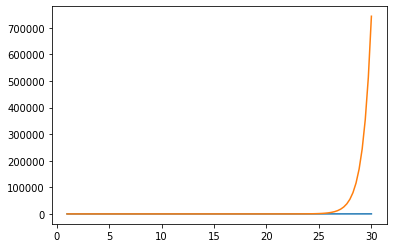

In [ ]:
from scipy.integrate import solve_ivp

#Prog: load("a19-n-pf.rr");
#matrix_matrix_to_list(y_pf());
#[[(-y-k+n-1)/(y),1,0,0],[0,(-y-k+n-1)/(y),1,0],[0,0,(-y-k+n-1)/(y),1],[((-k-1)*x)/(y^2),((-y+n)*x+n*k+2*n)/(y^2),(y*x+(k+n+3)*y-n^2-n)/(y^2),(-k-n-3)/(y)]]

# f=H^k_n(x,y), g=exp(-y)*y^(-(k-n+1))  Gauge.  k=10, n=1.
# Let F=(f,f',f'',f''] and dF/dy=P*F.  Put G=g*F.
# dG/dt=Q*G, Q is qq below.
def g(t):
    k=10
    n=1
    y=t;
    return np.exp(-y)*(y**(-(k-n+1)))

def hknJac(t,G):
    k=10
    n=1
    x=1
    y=t
    qq = np.array([[(-y-k+n-1)/(y),1,0,0],[0,(-y-k+n-1)/(y),1,0],[0,0,(-y-k+n-1)/(y),1],[((-k-1)*x)/(y**2),((-y+n)*x+n*k+2*n)/(y**2),(y*x+(k+n+3)*y-n**2-n)/(y**2),(-k-n-3)/(y)]])
    return qq
def hkn(t,G):    
    y=t
    gg=np.array([G[0],G[1],G[2],G[3]])
    qq = hknJac(t,G) 
    return list(np.matmul(qq,gg))

#print(hkn(1,[1,0,0,0]))
#print(g(2))
#Prog: test3-ak2.rr, Iv. Initial value of G(1,y) at y=t=1.
iv=[0.0287318962085547,0.0187481538210843,0.00754253574043086,0.00216602086364252]

upto=Upto
mymethod="RK45"
t=np.linspace(1,upto,100)
# Numerical solution of dG/dt=Q*G
sol = solve_ivp(hkn,[1,upto],iv,method=mymethod,dense_output="True",atol=0,rtol=Rtol)
z = sol.sol(t)
# 
plt.gca().clear()
plt.plot(t,hknData.h_10_1(t))
plt.plot(t,z[0].T/g(t))
plt.show()


21.505050505050505   0.32754162229644385


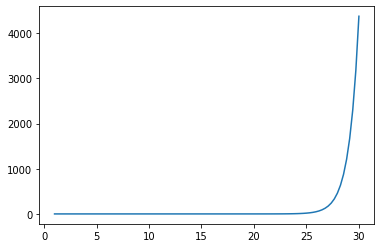

In [ ]:
#Relative error
plt.gca().clear()
# rerror=(z[0].T-hknData.h_10_1(t)*g(t))/hknData.h_10_1(t)*g(t)
rerror=(z[0].T/g(t)-hknData.h_10_1(t))/hknData.h_10_1(t)
minT(t,rerror)
plt.plot(t,rerror)
plt.show()

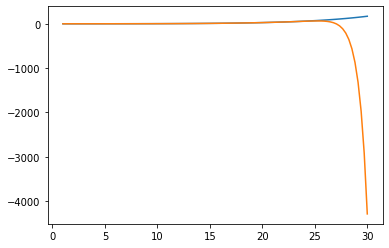

In [ ]:
upto=Upto
# ‘Radau’: Implicit Runge-Kutta method of the Radau IIA family of order 5 
#  Jacobian matrix is necessary
mymethod="Radau"
t=np.linspace(1,upto,100)
# Numerical solution
sol = solve_ivp(hkn,[1,upto],iv,method=mymethod,jac=hknJac,dense_output="True",atol=0,rtol=Rtol)
z = sol.sol(t)
# 
plt.gca().clear()
plt.plot(t,hknData.h_10_1(t))
plt.plot(t,z[0].T/g(t))
plt.show()

26.19191919191919   -0.3915055986455372


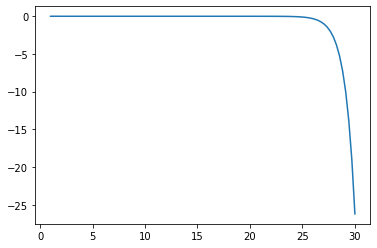

In [ ]:
#Relative error
plt.gca().clear()
# rerror=(z[0].T-hknData.h_10_1(t)*g(t))/hknData.h_10_1(t)*g(t)
rerror=(z[0].T/g(t)-hknData.h_10_1(t))/hknData.h_10_1(t)
minT(t,rerror)
plt.plot(t,rerror)
plt.show()

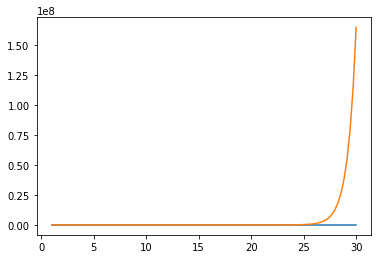

In [ ]:
upto=Upto
# ‘BDF’: # https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
# Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation 
#  Jacobian matrix is necessary,  first step and atol are not accepted.
mymethod="BDF"
t=np.linspace(1,upto,100)
# Numerical solution
sol = solve_ivp(hkn,[1,upto],iv,method=mymethod,jac=hknJac,dense_output="True",atol=0,rtol=Rtol)
z = sol.sol(t)
# 
plt.gca().clear()
plt.plot(t,hknData.h_10_1(t))
plt.plot(t,z[0].T/g(t))
plt.show()

16.81818181818182   0.3019831687735035


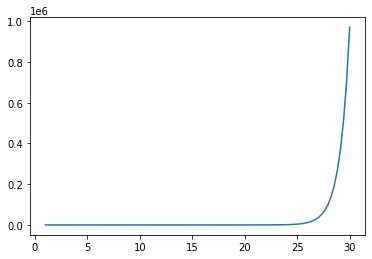

In [ ]:
#Relative error
plt.gca().clear()
# rerror=(z[0].T-hknData.h_10_1(t)*g(t))/hknData.h_10_1(t)*g(t)
rerror=(z[0].T/g(t)-hknData.h_10_1(t))/hknData.h_10_1(t)
plt.plot(t,rerror)
minT(t,rerror)
plt.show()

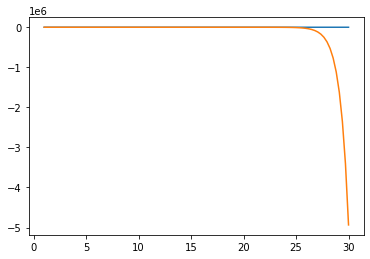

In [ ]:
upto=Upto
# LSODA, Adams/BDF method with automatic stiffness detection and switching [7], [8]. This is a wrapper of the Fortran solver from ODEPACK.
#  Jacobian matrix is necessary,  first step is not accepted. atol=0 improves
mymethod="LSODA"
t=np.linspace(1,upto,100)
# Numerical solution
sol = solve_ivp(hkn,[1,upto],iv,method=mymethod,jac=hknJac,dense_output="True",atol=0,rtol=Rtol)
z = sol.sol(t)
# 
plt.gca().clear()
plt.plot(t,hknData.h_10_1(t))
plt.plot(t,z[0].T/g(t))
plt.show()

20.04040404040404   -0.4012200848829741


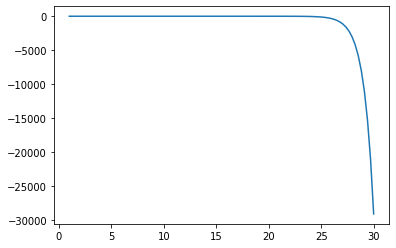

In [ ]:
#Relative error
plt.gca().clear()
# rerror=(z[0].T-hknData.h_10_1(t)*g(t))/hknData.h_10_1(t)*g(t)
rerror=(z[0].T/g(t)-hknData.h_10_1(t))/hknData.h_10_1(t)
plt.plot(t,rerror)
minT(t,rerror)
plt.show()

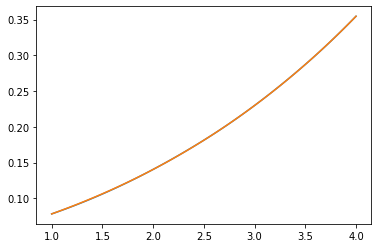

In [ ]:
upto=4
# LSODA, Adams/BDF method with automatic stiffness detection and switching [7], [8]. This is a wrapper of the Fortran solver from ODEPACK.
#  Jacobian matrix is necessary,  first step is not accepted. atol is default 1e-5 
mymethod="LSODA"
t=np.linspace(1,upto,100)
# Numerical solution
sol = solve_ivp(hkn,[1,upto],iv,method=mymethod,jac=hknJac,dense_output="True",atol=0,rtol=Rtol)
z = sol.sol(t)
# 
plt.gca().clear()
plt.plot(t,hknData.h_10_1(t))
plt.plot(t,z[0].T/g(t))

plt.show()

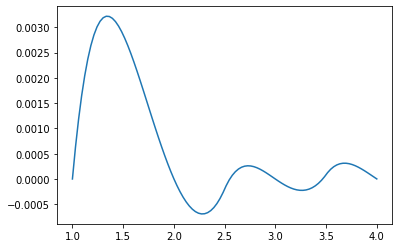

In [ ]:
#Relative error
plt.gca().clear()
# rerror=(z[0].T-hknData.h_10_1(t)*g(t))/hknData.h_10_1(t)*g(t)
rerror=(z[0].T/g(t)-hknData.h_10_1(t))/hknData.h_10_1(t)
plt.plot(t,rerror)

plt.show()